<hr style='margin-bottom:30px;'>

# Exploratory Data Analysis of Kaggle's Ohio Universities Employee Salaries (2011 - 2022)

__Analyzing historical changes in the salaries of employees in higher education and the differences between their fields!__

> This Dataset can be found [here](https://www.kaggle.com/datasets/asaniczka/university-employee-salaries-2011-present)


<a href='https://www.kaggle.com/datasets/asaniczka/university-employee-salaries-2011-present'><img src='salary.webp' style='width:300px; float:right; margin:30px 30px 30px 30px'></a>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Step 0: Imports and Reading Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.float_format','{:.2f}'.format)

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('higher_ed_employee_salaries.csv', header=0, sep=',',dtype={'Year':'str'},na_values=['None'])

In [5]:
df.head(5)

,Name,School,Job Description,Department,Earnings,Year
0,Don Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012


In [6]:
df.shape

(934348, 6)

In [7]:
df.columns

Index(['Name', 'School', 'Job Description', 'Department', 'Earnings', 'Year'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934348 entries, 0 to 934347
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             934348 non-null  object 
 1   School           934348 non-null  object 
 2   Job Description  907680 non-null  object 
 3   Department       873896 non-null  object 
 4   Earnings         924673 non-null  float64
 5   Year             934348 non-null  object 
dtypes: float64(1), object(5)
memory usage: 42.8+ MB


In [9]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934348 entries, 0 to 934347
Columns: 6 entries, Name to Year
dtypes: float64(1), object(5)
memory usage: 42.8+ MB


In [10]:
df.describe()

,Earnings
count,924673.00
mean,54659.13
std,61373.98
min,0.02
25%,20249.23
50%,44525.01
75%,70999.97
max,8021376.56


In [11]:
df.dtypes

Name                object
School              object
Job Description     object
Department          object
Earnings           float64
Year                object
dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 1: Data Preperation 

* Changing data types
* Splitting columns
* Renaming columns
* Checking for null values
* Checking for duplicates
* Checking outliers

> <span style='color:gold'>Changing data type of string columns to str</span>

In [12]:
number_columns = df.select_dtypes(include=['int','float','datetime']).columns
str_columns = df.columns[~(df.columns.isin(number_columns))]
str_columns

Index(['Name', 'School', 'Job Description', 'Department', 'Year'], dtype='object')

In [13]:
for i in str_columns:
    df[i] = df[i].astype(str)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934348 entries, 0 to 934347
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             934348 non-null  object 
 1   School           934348 non-null  object 
 2   Job Description  934348 non-null  object 
 3   Department       934348 non-null  object 
 4   Earnings         924673 non-null  float64
 5   Year             934348 non-null  object 
dtypes: float64(1), object(5)
memory usage: 42.8+ MB


> <span style='color:gold'>Splitting Name column into First Name and Last Name columns</span>

In [17]:
split_names = df['Name'].str.split(' ', n=1, expand=True)
split_names.columns = ['First_Name','Last_Name']

In [18]:
split_names

,First_Name,Last_Name
0,Don,Potter
1,Emily,Potter
2,Carol,Jean Potter
3,Kim,Potter
4,Graham,Potter
...,...,...
934343,Danielle,Noon
934344,Danielle,Noon
934345,Kristen,Lindsay Noon
934346,Danielle,Noon


In [19]:
df

,Name,School,Job Description,Department,Earnings,Year
0,Don Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012
...,...,...,...,...,...,...
934343,Danielle Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,31659.43,2021
934344,Danielle Noon,University of Toledo,Patient Registration Spec,Registration,7974.25,2019
934345,Kristen Lindsay Noon,The Ohio State University,Assistant Professor-Clinical,Anesthesiology,243033.56,2018
934346,Danielle Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,37642.16,2022


In [20]:
df = pd.concat([split_names,df],axis=1)

In [21]:
df

,First_Name,Last_Name,Name,School,Job Description,Department,Earnings,Year
0,Don,Potter,Don Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily,Potter,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol,Jean Potter,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim,Potter,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham,Potter,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012
...,...,...,...,...,...,...,...,...
934343,Danielle,Noon,Danielle Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,31659.43,2021
934344,Danielle,Noon,Danielle Noon,University of Toledo,Patient Registration Spec,Registration,7974.25,2019
934345,Kristen,Lindsay Noon,Kristen Lindsay Noon,The Ohio State University,Assistant Professor-Clinical,Anesthesiology,243033.56,2018
934346,Danielle,Noon,Danielle Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,37642.16,2022


In [22]:
df.drop(columns=['Name'],inplace=True)

In [23]:
df

,First_Name,Last_Name,School,Job Description,Department,Earnings,Year
0,Don,Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily,Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol,Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim,Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham,Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012
...,...,...,...,...,...,...,...
934343,Danielle,Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,31659.43,2021
934344,Danielle,Noon,University of Toledo,Patient Registration Spec,Registration,7974.25,2019
934345,Kristen,Lindsay Noon,The Ohio State University,Assistant Professor-Clinical,Anesthesiology,243033.56,2018
934346,Danielle,Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,37642.16,2022


> <span style='color:gold'>Renaming columns</span>

In [24]:
df.rename(columns={'Job Description':'Job_Description'},inplace=True)

In [25]:
df

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
0,Don,Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily,Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol,Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim,Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham,Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012
...,...,...,...,...,...,...,...
934343,Danielle,Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,31659.43,2021
934344,Danielle,Noon,University of Toledo,Patient Registration Spec,Registration,7974.25,2019
934345,Kristen,Lindsay Noon,The Ohio State University,Assistant Professor-Clinical,Anesthesiology,243033.56,2018
934346,Danielle,Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,37642.16,2022


> <span style='color:gold'>Checking null values</span>

In [26]:
df.isna().sum()

First_Name            0
Last_Name             1
School                0
Job_Description       0
Department            0
Earnings           9675
Year                  0
dtype: int64

In [27]:
df.loc[df['Last_Name'].isna()]

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
589018,Name,None,University Of Cincinnati,Job Description,Department,NaN,2011


In [28]:
df.dropna(subset=['Last_Name'],inplace=True)

In [29]:
df.isna().sum()

First_Name            0
Last_Name             0
School                0
Job_Description       0
Department            0
Earnings           9674
Year                  0
dtype: int64

In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
0,Don,Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily,Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol,Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim,Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham,Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012
...,...,...,...,...,...,...,...
934342,Danielle,Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,31659.43,2021
934343,Danielle,Noon,University of Toledo,Patient Registration Spec,Registration,7974.25,2019
934344,Kristen,Lindsay Noon,The Ohio State University,Assistant Professor-Clinical,Anesthesiology,243033.56,2018
934345,Danielle,Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,37642.16,2022


In [35]:
df.loc[df['Earnings'].isna()]

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
58,Graham,Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",NaN,2015
112,Lee,Poeppelman,University Of Cincinnati,Asst Professor - Visiting,COM Cancer and Cell Biology,NaN,2012
182,Alexandru,Alin Pogan,Miami University,Assistant Professor,Arts & Science Admin,NaN,2013
215,Laura,Schetter,Miami University,Adjunct Instructor,Arts & Science Admin,NaN,2014
216,Laura,Schetter,Miami University,Adjunct Instructor,Arts & Science Admin,NaN,2015
...,...,...,...,...,...,...,...
933284,Kathryn,Conrad,Miami University,SPEC Temp Unclass Staff CAS,Arts & Science Admin,NaN,2014
933318,Kathryn,Conrad,Miami University,SPEC Temp Unclass Staff CAS,Arts & Science Admin,NaN,2015
933546,Robert,J Kohlman,University Of Cincinnati,Instructor - Adj,UCBA Office Administration,NaN,2012
933716,Tsun-Hui,Hung,University Of Cincinnati,Instructor - Adj,"CCM Composition, Musicology & Theory",NaN,2012


> <span style='color:gold'>Checking duplicates</span>

In [36]:
df.duplicated().sum()

133212

In [37]:
df.loc[df.duplicated()]

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
189,Brett,W Pogan,Bowling Green State University,Senior Capital Planner,Capital Planning,99112.41,2017
2476,Ben,Rhinehart,Wright State University,Adjunct,Info Syst & Supply Chain Mgt,24280.00,2017
6797,Roig-Torres,Teresa M.,University Of Cincinnati,Professor,nan,92577.84,2020
7873,Mark,A. Ernst,Wright State University,Adjunct Instructor,Lake Campus Liberal Arts,32306.33,2017
8974,Mitchell,Miller,Bowling Green State University,Coordinator,College of Education - Admin,64918.00,2018
...,...,...,...,...,...,...,...
934251,Jacqueline,Michele Nolting,The Ohio State University,Clinical Laboratory Manager,Veterinary Preventive Med,51561.20,2014
934252,Robin,A Nolting,The Ohio State University,Patient Revenue Cycle Spclst,Cancer Hosp & Research Instit,33962.87,2014
934258,Robin,A Nolting,The Ohio State University,Patient Revenue Cycle Spclst,Cancer Hosp & Research Instit,38951.10,2017
934335,Kevin,R Noon,Bowling Green State University,Director of Operations,Basketball-Men,28676.92,2015


In [38]:
df.loc[(df['First_Name'] == 'Brett') & (df['Last_Name'] == 'W Pogan') & (df['Year'] == '2017')] 

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
183,Brett,W Pogan,Bowling Green State University,Senior Capital Planner,Capital Planning,99112.41,2017
189,Brett,W Pogan,Bowling Green State University,Senior Capital Planner,Capital Planning,99112.41,2017


In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.duplicated().sum()

0

In [41]:
df.reset_index(drop=True,inplace=True)

In [42]:
df

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
0,Don,Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily,Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol,Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim,Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham,Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012
...,...,...,...,...,...,...,...
801130,Danielle,Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,31659.43,2021
801131,Danielle,Noon,University of Toledo,Patient Registration Spec,Registration,7974.25,2019
801132,Kristen,Lindsay Noon,The Ohio State University,Assistant Professor-Clinical,Anesthesiology,243033.56,2018
801133,Danielle,Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,37642.16,2022


In [43]:
df.loc[df.duplicated(subset=['Year','First_Name','Last_Name','Job_Description'])]

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
620,Holly,Raffle,Ohio University,nan,Voinovich Schl - Bldg 22,44476.39,2015
683,Joann,Ragan,Youngstown State University,PTF Nursing,Nursing,5200.00,2021
1888,Jennifer,Kirkpatrick,Youngstown State University,PTF Art,Art,3464.02,2020
3566,Anna,Marie Ruscitti,Youngstown State University,Administrative Assistant 1,Theatre and Dance,539.84,2018
3568,Anna,Marie Ruscitti,Youngstown State University,Administrative Assistant 1,Performing Arts Series,4087.36,2018
...,...,...,...,...,...,...,...
798875,Wesley,D. Taggart,Kent State University,Faculty Part-Time -Semester,Computer Technology,2565.00,2014
799837,Paul,Patton,Ohio University,nan,Sociology and Anthropology,31213.81,2014
800649,Gayle,Tenenbaum,Ohio University,nan,Voinovich Schl - Bldg 22,20000.00,2014
800804,Gary,Nott,Ohio University,nan,Custodial Services - 3rd Shift,24792.35,2015


In [44]:
df.loc[(df['Year'] == '2015') & (df['First_Name'] == 'Holly') & (df['Last_Name'] == 'Raffle')]

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
617,Holly,Raffle,Ohio University,nan,Voinovich Schl - Bldg 22,70469.67,2015
620,Holly,Raffle,Ohio University,nan,Voinovich Schl - Bldg 22,44476.39,2015


> <span style='color:gold'>Checking for outliers</span>

In [45]:
df.describe()

,Earnings
count,792807.00
mean,54961.68
std,62151.92
min,0.02
25%,20285.57
50%,44702.68
75%,71280.00
max,8021376.56


In [46]:
df.loc[df['Earnings'] == df['Earnings'].min()]

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
772313,chaimaa,bourza,The Ohio State University,Custodial Worker 2 (HS),Ambulatory Services | Dublin Administration,0.02,2022


In [47]:
df.sort_values(by='Earnings').head(10)

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
772313,chaimaa,bourza,The Ohio State University,Custodial Worker 2 (HS),Ambulatory Services | Dublin Administration,0.02,2022
43354,Michael,Hunter,The Ohio State University,Program Assistant,Athletics | Football,0.03,2022
239576,Derek,Lockett,The Ohio State University,Psychiatric Care Technician (HS),Health System,0.03,2021
732129,Hannah,Salyers,The Ohio State University,Patient Care Associate (HS),"University Hospital | 4 Dodd Hall, General and...",0.03,2022
493616,Genisis,White,The Ohio State University,Psychiatric Care Technician (HS),University Hospital | Emergency Department,0.03,2022
93865,Demirra,Muhammad,The Ohio State University,Patient Care Associate (HS),"James | 20 East and West, Gynecology and Urology",0.05,2022
536463,Aungelique,Bailey,University Of Cincinnati,Integration: default position,Hoxworth Appointment Center,0.05,2015
447140,Lashawn,Hargrove,The Ohio State University,Patient Transporter (HS),University Hospital | Diagnostic Transportation,0.05,2022
570597,Lynn,Williams,The Ohio State University,Med Ctr Security Dispatcher (HS),Health System Shared Services | Security,0.05,2022
261980,Zachary,Gottschall,The Ohio State University,Clinical Research Assistant,CCC | Clinical Trials Office,0.06,2022


In [48]:
df.loc[df['Earnings'] < 10000]

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
0,Don,Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
4,Graham,Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012
14,Archie,Potter,Ohio University,Facilitator,LLL Undergrad Online,2450.00,2014
20,Graham,Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",8031.69,2014
24,Theresa,Potter,The Ohio State University,Tutor 3,Undergraduate Education | Student Athlete Supp...,471.00,2022
...,...,...,...,...,...,...,...
801086,Helen,Nondo,Central State University,Adjunct Professor Session I,BUSINESS ADMINISTRATION,6555.00,2019
801104,Phung,Kim Nong,The Ohio State University,Pharmacy Technician,University Hospitals,6722.06,2017
801107,Rodha,Ahmed Nooh,The Ohio State University,Internal Resource Pool-Allied,Shared Services,4389.21,2015
801117,Tonya,Nooks,The Ohio State University,Unit Clerical Associate (HS),Health System,625.74,2021


In [49]:
df.loc[df['Earnings'] < 100000].shape[0]

699005

In [85]:
filtered_na_df = df.dropna(subset=['Earnings']).reset_index(drop=True)

In [86]:
salaries_summed_per_year = filtered_na_df.groupby(['First_Name','Last_Name','Year'])['Earnings'].sum().reset_index()
salaries_summed_per_year

,First_Name,Last_Name,Year,Earnings
0,*,Aparnnaa,2016,1600.00
1,*,Aparnnaa,2017,2400.00
2,*,Aparnnaa,2018,4400.00
3,.,Kanhaiya,2015,10726.36
4,.,Kanhaiya,2016,34862.50
...,...,...,...,...
774605,yordi,ghebremicael,2021,863.34
774606,younes,messaoudene,2022,2754.64
774607,zac,Scirocco,2021,71787.68
774608,zac,Scirocco,2022,49565.54


In [88]:
(filtered_na_df.shape[0] - filtered_na_df.duplicated(subset=['First_Name','Last_Name','Year']).sum()) == salaries_summed_per_year.shape[0]

True

In [91]:
quantiles = salaries_summed_per_year['Earnings'].quantile(np.array([0.00, 0.25, 0.50, 0.75]))
quantiles["RightTailMax"] = ((quantiles[0.75] - quantiles[0.25]) * 1.5) + (quantiles[0.75])
quantiles.index = ["Min", "Q1", "Median", "Q3","RightTailMax"]
quantiles

Min                 0.02
Q1              22270.71
Median          45676.02
Q3              72408.97
RightTailMax   147616.36
Name: Earnings, dtype: float64

/tmp/ipykernel_2544/87298906.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["{:,.0f}".format(x) for x in plt.xticks()[0]])


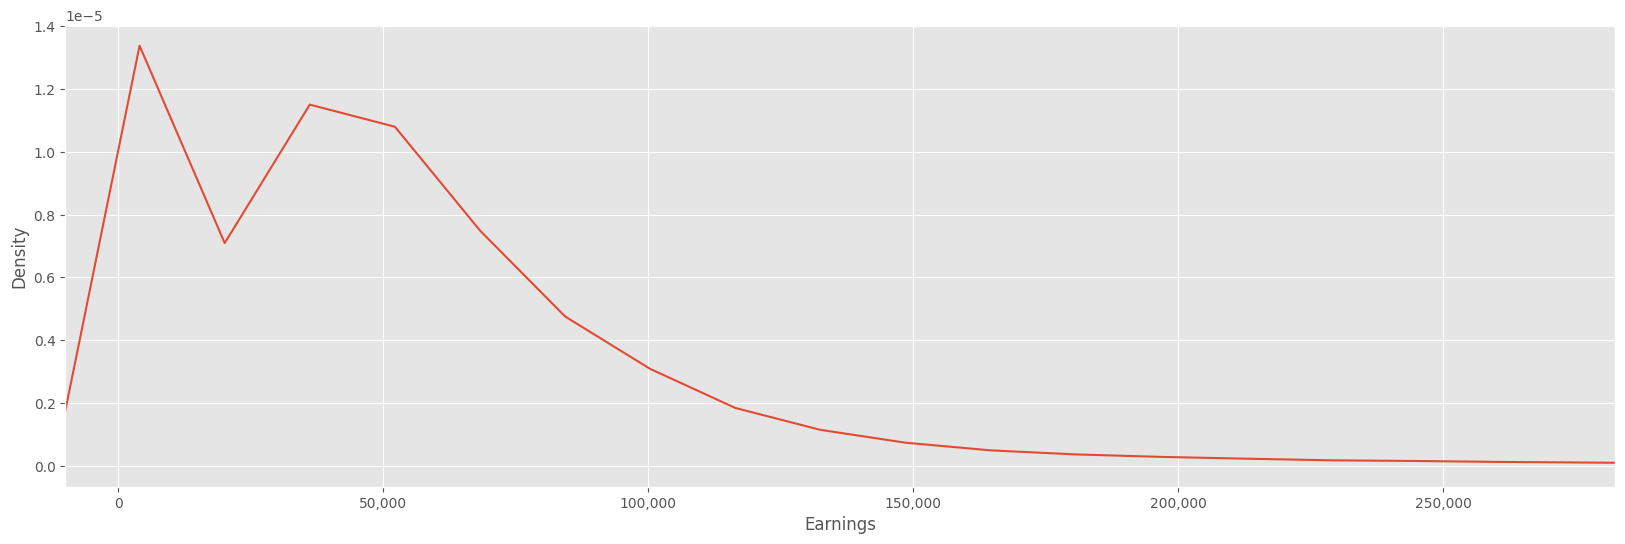

In [92]:
ax = salaries_summed_per_year['Earnings'].plot(kind='kde', figsize=(20,6))
ax.set_xlim(-10000, salaries_summed_per_year['Earnings'].quantile(0.99))
ax.set_xlabel("Earnings")
ax.set_xticklabels(["{:,.0f}".format(x) for x in plt.xticks()[0]])
plt.show()

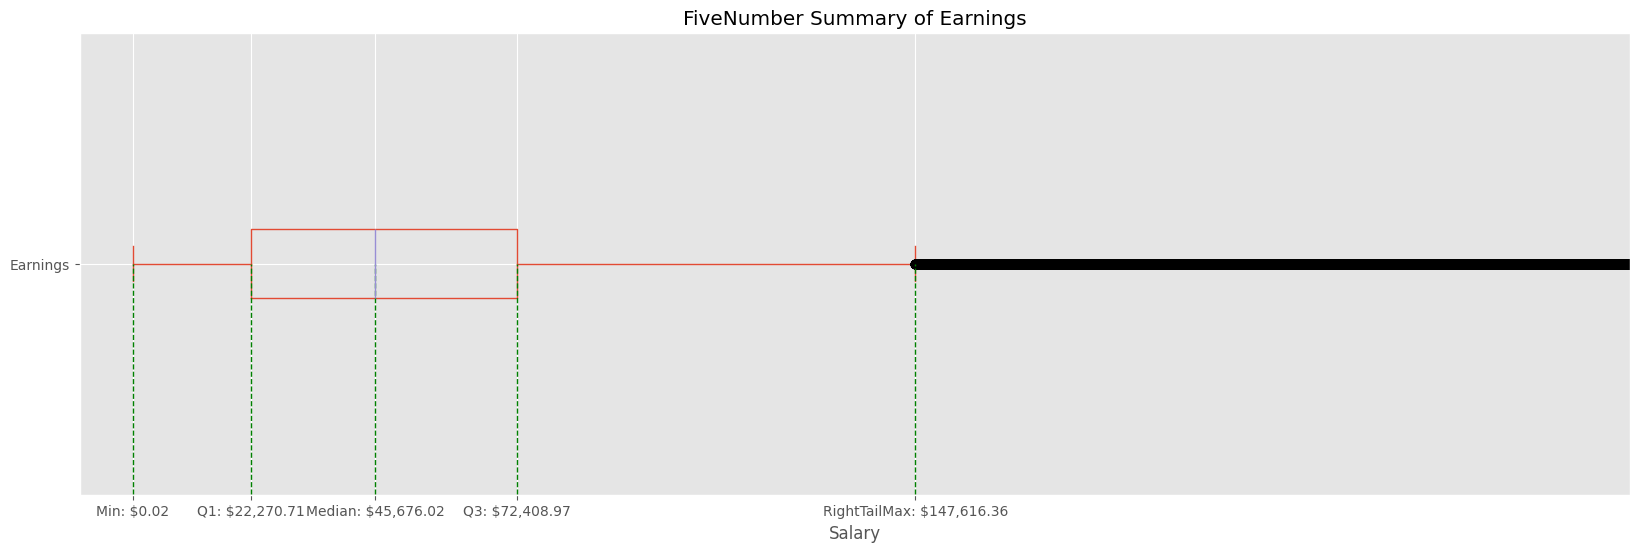

In [94]:
ax = salaries_summed_per_year['Earnings'].plot(kind='box', vert=False, figsize=(20,6))
# for quantile in quantiles:
#     ax.axvline(x=quantile,ymin=0, ymax=0.42,color="Green",lw=1, linestyle="--",marker="o")
#     ax.text(x=quantile, y=0.35, s=str("{:.2f}".format(quantile)),horizontalalignment='center',verticalalignment='center')
ax.vlines(quantiles, ymin=np.zeros(len(quantiles)),ymax=np.ones(len(quantiles)),color="Green", lw=1, linestyle="--")
ax.set_ylim(0.5,1.5)
ax.set_xlim(left=-10000,right=salaries_summed_per_year['Earnings'].quantile(.99))
ax.set_xticks(quantiles,labels=[str(quantiles[quantiles == x].index[0]) + ": $" + "{:,.2f}".format(x) for x in quantiles])
ax.set_title("FiveNumber Summary of Earnings")
ax.set_xlabel("Salary")
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 2: Feature Understanding 

(Univariate analysis)



In [95]:
filtered_na_df = df[df['Earnings'].notna()].reset_index(drop=True)

In [97]:
filtered_na_df

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
0,Don,Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily,Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol,Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim,Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham,Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012
...,...,...,...,...,...,...,...
792802,Danielle,Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,31659.43,2021
792803,Danielle,Noon,University of Toledo,Patient Registration Spec,Registration,7974.25,2019
792804,Kristen,Lindsay Noon,The Ohio State University,Assistant Professor-Clinical,Anesthesiology,243033.56,2018
792805,Danielle,Noon,University of Toledo,Medical Assistant,OP-Clinic-Orthopedic,37642.16,2022


In [98]:
df.loc[df.duplicated(subset=['First_Name', 'Last_Name', 'Earnings', 'Year'])]

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
3429,Joseph,P Frizado,Bowling Green State University,Vice Provost Acad Ops/Assessmt,Office of the Provost,15421.91,2016
5892,Katherine,Robertson,Wright State University,Teaching Assistant,Academic Affairs-SOM,273.86,2012
8003,Michelle,DeFabio,Youngstown State University,Supplement 2019-20:167,Dean - Education,200.00,2020
8118,Bruce,E Strine,Wright State University,Adjunct,Lake Campus Liberal Arts,7800.00,2011
13036,Carole,Lou Roberts,Wright State University,Adjunct,Professional Field Experiences,5610.01,2012
...,...,...,...,...,...,...,...
790890,Bonnie,Lee Fink,Bowling Green State University,Director/Senior Lecturer,Center for Teaching & Learning,1820.00,2016
791231,Mary,L. Huist,Wright State University,Teaching Assistant,Academic Affairs-SOM,578.88,2011
791233,Mary,L. Huist,Wright State University,Simulated Patient,Academic Affairs-SOM,81.42,2012
793516,Jean,Stang,University of Akron,Senior Lecturer,Social Work,15520.35,2020


In [99]:
df.loc[(df['First_Name'] == 'Joseph') & (df['Last_Name'] == 'P Frizado') & (df['Year'] == '2016')]

,First_Name,Last_Name,School,Job_Description,Department,Earnings,Year
3427,Joseph,P Frizado,Bowling Green State University,Vice Provost for Academic Ops,Office of the Provost,15421.91,2016
3429,Joseph,P Frizado,Bowling Green State University,Vice Provost Acad Ops/Assessmt,Office of the Provost,15421.91,2016


In [ ]:
### USE GROUPBY TO GET THE SUM OF DUPLICATE EARNINGS EVERY YEAR

In [54]:
earnings_reported_per_year = filtered_na_df.drop_duplicates(subset=['First_Name', 'Last_Name', 'Earnings', 'Year']).groupby('Year')['Earnings'].count()
earnings_reported_per_year

Year
2011    23114
2012    37497
2013    69701
2014    68220
2015    70697
2016    73825
2017    76039
2018    74624
2019    72265
2020    73565
2021    74836
2022    77827
Name: Earnings, dtype: int64

In [52]:
earnings_reported_per_year.mean()

66017.5

/tmp/ipykernel_4111/124717283.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["{:,.0f}".format(x) for x in plt.yticks()[0]])


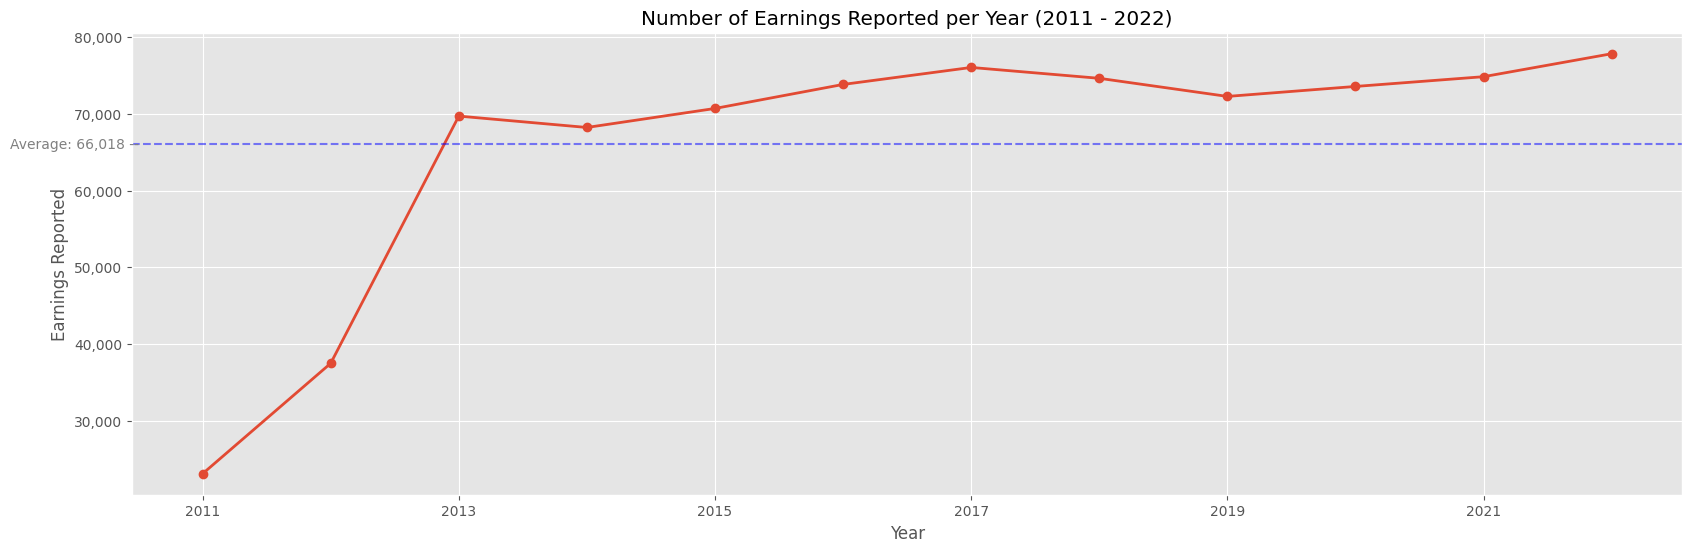

In [53]:
ax = earnings_reported_per_year.plot(figsize=(20,6), lw=2,marker="o", linestyle="-")
ax.set_ylabel("Earnings Reported")
ax.set_title("Number of Earnings Reported per Year (2011 - 2022)")
ax.axhline(earnings_reported_per_year.mean(),alpha=0.5, linestyle='--',color='b')
ax.set_yticklabels(["{:,.0f}".format(x) for x in plt.yticks()[0]]) 
ax.text(-1.0,earnings_reported_per_year.mean(),f'Average: {str("{:,.0f}".format(earnings_reported_per_year.mean()))} --',horizontalalignment='center',verticalalignment='center',color='grey')
plt.show()

In [54]:
number_of_employees_per_university = df.drop_duplicates(subset=['First_Name','Last_Name','Year','School']).reset_index(drop=True)
number_of_employees_per_university = number_of_employees_per_university.loc[number_of_employees_per_university['Year'] == "2022"]['School'].value_counts()
number_of_employees_per_university

School
The Ohio State University         40013
University Of Cincinnati           5832
University of Toledo               5637
Ohio University                    4282
Kent State University              4205
Miami University                   3998
University of Akron                2609
Bowling Green State University     2099
Wright State University            2054
Cleveland State University         1720
Youngstown State University        1719
Central State University            668
Shawnee State University            603
Name: count, dtype: int64

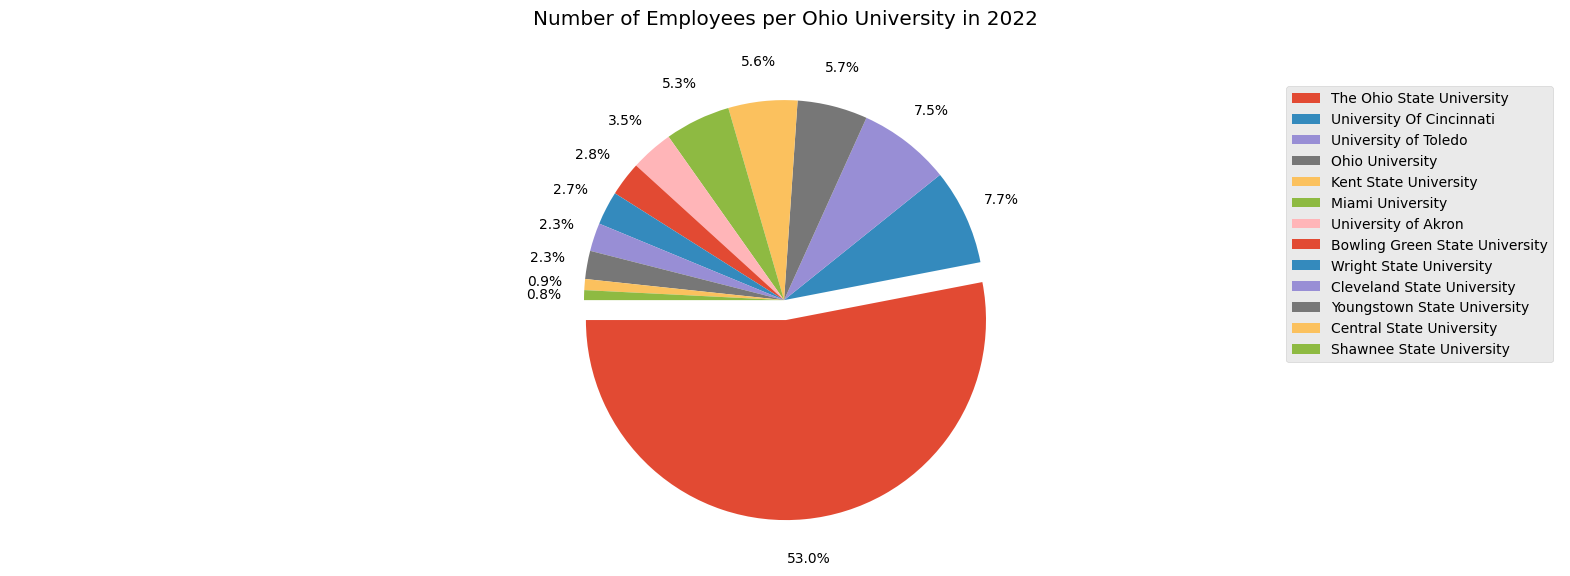

In [55]:
explosions = [0.1] + [0] * (len(number_of_employees_per_university)-1)
ax = number_of_employees_per_university.plot(kind='pie', title='Number of Employees per Ohio University in 2022',explode=explosions,labels=None,startangle=180, autopct='%1.1f%%',figsize=(20,6),labeldistance=1.05,pctdistance=1.2)
ax.legend(labels=number_of_employees_per_university.index)
plt.title('Number of Employees per Ohio University in 2022', y=1.1)
plt.ylabel("")
plt.axis('equal')
colors = [patch.get_facecolor() for patch in ax.patches]
plt.show()

In [56]:
x = np.arange(6)
y = np.arange(2)

X,Y = np.meshgrid(x,y)
result = np.column_stack((X.flatten(), Y.flatten()))
result

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [5, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1],
       [5, 1]])

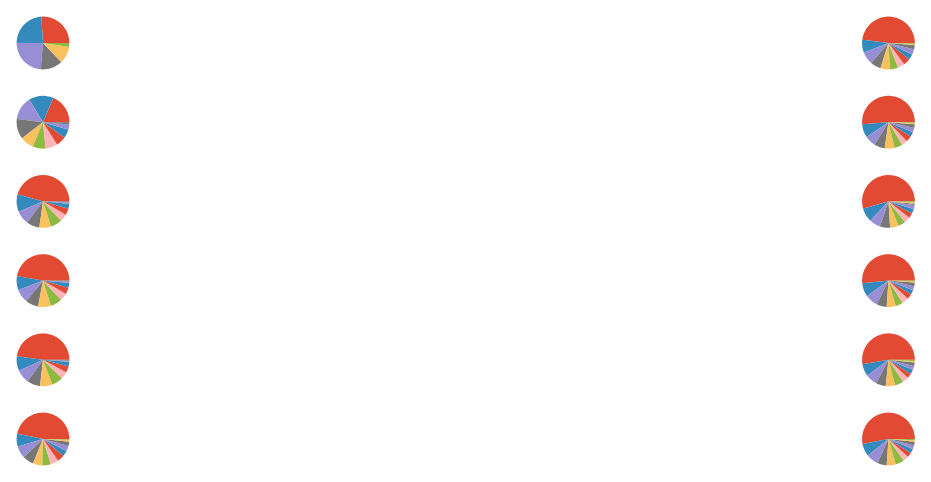

In [57]:
years = [2011 + i for i in range(12)]
number_of_employees_per_university = df.drop_duplicates(subset=['First_Name','Last_Name','Year','School']).reset_index(drop=True)
fig,ax = plt.subplots(nrows=len(years)//2, ncols=2,figsize=(20,6))

for i in range(len(result)):
    ax[result[i][0],result[i][1]].pie(number_of_employees_per_university.loc[number_of_employees_per_university['Year'] == str(years[i])]['School'].value_counts())

In [ ]:
ax = number_of_employees_per_university.plot(kind='bar', figsize=(20,6),title='Number of Employees per Ohio University in 2022',color=colors,label=None)
ax.set_ylabel("Employee Count")
ax.set_yticklabels(["{:,.0f}".format(x) for x in plt.yticks()[0]])
handles1 = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(handles1,[f"{x}: " + "{:,.0f}".format(number_of_employees_per_university[x]) for x in number_of_employees_per_university.index])
plt.show()

In [ ]:
average_earnings_per_year = filtered_na_df.drop_duplicates(subset=['First_Name', 'Last_Name', 'Year']).groupby("Year")["Earnings"].mean()
average_earnings_per_year

In [ ]:
ax = average_earnings_per_year.plot(figsize=(20,6), lw=1, linestyle='-', marker='o')
ax.set_yticklabels(["$" + "{:,.2f}".format(x) for x in plt.yticks()[0]])
ax.set_ylabel("Average Salary")
ax.set_title("Average Salary for Employees Across Ohio Universitys per Year")
ax.axhline(average_earnings_per_year.mean(), color="blue",alpha=0.5,linestyle="--")
ax.text(x=-1.1,y=average_earnings_per_year.mean(), color='grey',s="Average: $" + str("{:,.2f}".format(average_earnings_per_year.mean())) + "    --" ,horizontalalignment='center',verticalalignment='center',alpha=0.5)
plt.show()

In [ ]:
df

In [ ]:
average_salary_per_uni = filtered_na_df.drop_duplicates(subset=['First_Name','Last_Name','Year','School']).reset_index(drop=True)
average_salary_per_uni = average_salary_per_uni.loc[average_salary_per_uni['Year'] == '2022'].groupby("School")['Earnings'].mean()
average_salary_per_uni = average_salary_per_uni.sort_values(ascending=False)

In [ ]:
ax = average_salary_per_uni.plot(kind='bar',figsize=(20,10), title='Average Salary per University in 2022',color=colors)
ax.set_ylabel("Average Earnings")
ax.set_yticklabels(["${:,.0f}".format(x) for x in plt.yticks()[0]])
ax.axhline(average_salary_per_uni.mean(), lw=1, linestyle='--', alpha=0.9)
ax.text(x=-1.07, y= average_salary_per_uni.mean(),s="Average: $" + str("{:,.0f}".format(average_salary_per_uni.mean())) + " -",horizontalalignment='center',verticalalignment='center',color='grey')
ax.legend(handles1, [f"{x}: $" + "{:,.0f}".format(average_salary_per_uni[x]) for x in average_salary_per_uni.index])
plt.show()

In [ ]:
profs = filtered_na_df.loc[filtered_na_df['Job_Description'].str.lower() == 'professor']
profs.loc[profs.duplicated(subset=['First_Name','Last_Name', 'Year'])].shape[0]

In [ ]:
duplicated_profs = profs.loc[profs.duplicated(subset=['First_Name','Last_Name', 'Year'],keep=False)]
duplicated_profs

In [ ]:
duplicated_profs.sort_values(by=['First_Name','Year'])

In [ ]:
professors_that_changed_uni_same_year = duplicated_profs.groupby(['First_Name','Last_Name','Year'])['School'].nunique().reset_index()
professors_that_changed_uni_same_year = professors_that_changed_uni_same_year.loc[professors_that_changed_uni_same_year['School'] > 1]
professors_that_changed_uni_same_year

In [ ]:
profs.loc[(profs['First_Name'] == 'Lei') & (profs['Last_Name'] == 'Cao') & (profs['Year'] == "2020")] 

In [ ]:
average_professor_salary_per_year = filtered_na_df.drop_duplicates(subset=['First_Name','Last_Name','Year','School']).reset_index(drop=True)
average_professor_salary_per_year = average_professor_salary_per_year[average_professor_salary_per_year['Job_Description'].str.lower() == 'professor']
average_professor_salary_per_year

In [ ]:
average_professor_salary_per_year.head(50)

In [ ]:
average_professor_salary_per_year = average_professor_salary_per_year.groupby("Year")['Earnings'].mean()

In [ ]:
ax = average_professor_salary_per_year.plot(figsize=(20,6),title="Average Traditional Professor Salary per Year (2011 - 2022)",marker='o')
ax.set_ylabel("Average Earnings")
ax.set_yticklabels(["$" "{:,.0f}".format(x) for x in plt.yticks()[0]])
ax.axhline(average_professor_salary_per_year.mean(),lw=1, linestyle="--",color='blue',alpha=0.9)
ax.legend(handles, [f"{x}: $" + "{:,.0f}".format(average_professor_salary_per_year[x]) for x in average_professor_salary_per_year.index])
plt.show()